In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [3]:
os.chdir(r'C:\Users\sl456\Dropbox (HMS)\zKyunKyun_storage\cBioPortal\Metabric_2012Nature\python\ExpressionAnalysis_PIK3CAmNF1w_PIK3CAmNF1m')

In [4]:
# read csv file

# df_TumorID = pd.read_csv('TumorID_PIK3CAmAny_NF1.csv')
df_expression = pd.read_csv('data_expression.csv')

df_clinical = pd.read_csv('2509tumor_clinical_kyun.csv')
df_clinical.index = df_clinical['Sample ID']

In [5]:
df_TumorID = pd.read_csv('TumorID_PIK3CAm_allMAPKpathway.csv')

In [6]:
df_expression.index = df_expression['Hugo_Symbol']

In [7]:
df_exp = df_expression.T
df_exp['Sample ID'] = df_exp.index

In [8]:
# NF1wt_PIK3CAm and NF1m_PIK3CAm and OtherMut_PIK3CAm

WM_TumorID = df_TumorID.loc[df_TumorID['Group']=='WM']
MM_TumorID = df_TumorID.loc[df_TumorID['Group']=='MM']
OM_TumorID = df_TumorID.loc[df_TumorID['Group']=='OM']

In [9]:
NRAS_TumorID = df_TumorID.loc[df_TumorID['NRAS: MUT AMP GAIN;'].isin(['CNA: AMP;', 'CNA: GAIN;'])]

In [10]:
df_clinical

,Patient ID,Sample ID,Nottingham prognostic index,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Cohort,ER Status,ER status measured by IHC,...,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Cancer Studies,Sample Type,Tumor Other Histologic Subtype,Tumor Size,Tumor Stage,Type of Breast Surgery
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0002,MB-0002,MB-0002,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Living,r,YES,brca_metabric,Primary,IDC,10.0,1.0,BREAST CONSERVING
MB-0005,MB-0005,MB-0005,4.030,Breast Cancer,Breast Invasive Ductal Carcinoma,high,YES,1.0,+,pos,...,NaN,Died of Disease,r,NO,brca_metabric,Primary,IDC,15.0,2.0,MASTECTOMY
MB-0006,MB-0006,MB-0006,4.050,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,25.0,2.0,MASTECTOMY
MB-0010,MB-0010,MB-0010,4.062,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,31.0,4.0,MASTECTOMY
MB-0014,MB-0014,MB-0014,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,10.0,2.0,BREAST CONSERVING
MB-0020,MB-0020,MB-0020,6.130,Breast Cancer,Invasive Breast Carcinoma,high,YES,1.0,-,neg,...,ER-/HER2-,Died of Disease,l,YES,brca_metabric,Primary,ILC,65.0,3.0,MASTECTOMY
MB-0022,MB-0022,MB-0022,4.058,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,moderate,NO,1.0,+,pos,...,NaN,Died of Other Causes,l,YES,brca_metabric,Primary,IDC+ILC,29.0,2.0,BREAST CONSERVING
MB-0667,MB-0667,MB-0667,6.068,Breast Cancer,Invasive Breast Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,34.0,2.0,BREAST CONSERVING
MB-0028,MB-0028,MB-0028,5.032,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Other Causes,r,YES,brca_metabric,Primary,IDC,16.0,2.0,BREAST CONSERVING


In [11]:
MM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(MM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]
WM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(WM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]
OM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(OM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]

In [12]:
NRAS_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(NRAS_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]

In [14]:
print(shape(NRAS_TumorID)) #PIK3CA_mut
print(shape(NRAS_TumorID_clinical)) #ER+ and PIK3CA_mut

(28, 14)
(23, 32)


In [15]:
MM_exp = df_exp.loc[df_exp['Sample ID'].isin(MM_TumorID_clinical['Sample ID'])]
WM_exp = df_exp.loc[df_exp['Sample ID'].isin(WM_TumorID_clinical['Sample ID'])]
OM_exp = df_exp.loc[df_exp['Sample ID'].isin(OM_TumorID_clinical['Sample ID'])]

In [16]:
OM_exp

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A,Sample ID
MB-0362,8.67698,6.07533,5.45393,4.99452,5.83827,6.3975,7.90622,5.25946,5.70238,6.93074,...,5.68032,7.68849,8.08498,5.1618,6.35322,4.83648,7.30464,5.25184,5.04959,MB-0362
MB-0574,8.81486,5.62874,5.47194,5.31652,5.84943,6.11687,9.20638,5.39658,5.43913,6.4301,...,5.63225,7.74456,8.31002,5.78006,6.42405,5.19315,6.90365,5.09193,5.22713,MB-0574
MB-0223,9.47054,6.20376,5.48712,5.2679,5.87708,5.87547,8.60737,5.5356,5.42384,6.38062,...,5.59738,7.8537,8.01517,6.57516,6.67818,5.20011,6.09842,5.28194,5.31531,MB-0223
MB-0497,9.27137,5.86227,5.52873,5.38424,6.26786,6.9153,8.2475,5.30415,5.3998,5.72541,...,5.27928,7.73913,7.94151,5.43123,5.99623,5.07124,6.05949,5.46471,4.95892,MB-0497
MB-0143,8.45624,6.38223,5.22344,5.49825,5.99289,5.45834,8.42478,5.25455,5.81568,6.86629,...,5.30438,7.78757,9.00557,7.33131,6.27739,5.25081,8.02647,5.41571,5.2888,MB-0143
MB-0443,8.90913,6.35601,5.35056,5.26552,6.3114,6.96469,8.34098,5.20275,5.5298,6.31667,...,5.26166,7.61051,7.6333,5.24554,6.17582,5.187,5.91595,5.1012,5.11631,MB-0443
MB-0322,8.5772,5.61243,5.35966,5.17116,6.06374,5.70172,8.77715,5.30524,5.63356,6.45431,...,5.37866,7.68522,8.48714,5.4095,6.43804,5.29459,7.38877,5.48758,5.18887,MB-0322
MB-0138,9.47331,6.16739,5.36676,5.13943,5.62007,6.36218,8.5229,5.2179,5.45099,5.8526,...,5.38314,7.18763,8.42202,5.40069,6.68596,5.23558,7.65694,5.31723,5.33689,MB-0138
MB-0579,9.37536,7.4162,5.39299,5.30027,5.7672,5.63916,8.15665,5.38062,5.54756,6.90097,...,5.51044,7.07729,8.2554,5.14284,6.53463,5.41956,7.47053,5.35827,5.08828,MB-0579
MB-0272,8.54255,5.97234,5.39426,5.28969,5.76563,5.86578,7.97728,5.3805,5.58714,6.59089,...,5.59646,7.77784,8.31567,5.23552,6.38364,5.28304,6.99804,5.42304,5.27598,MB-0272


In [17]:
# ER postivive, PIK3CA tumor ID

pd.Series(list(MM_TumorID_clinical.index) + list(WM_TumorID_clinical.index) + list(OM_TumorID_clinical.index)).to_csv('TumorID_ER+PIK3CAmut.csv')

In [18]:
print('PIK3CA-mut')
print(shape(MM_TumorID))
print(shape(WM_TumorID))
print(shape(OM_TumorID)); print()

print('ER+ and PIK3CA-mut')
print(shape(MM_TumorID_clinical))
print(shape(WM_TumorID_clinical))
print(shape(OM_TumorID_clinical)); print()

print(shape(MM_exp))
print(shape(WM_exp))
print(shape(OM_exp))

PIK3CA-mut
(225, 14)
(475, 14)
(275, 14)

ER+ and PIK3CA-mut
(155, 32)
(326, 32)
(208, 32)

(155, 24369)
(326, 24369)
(208, 24369)


In [19]:
MM_exp['Group'] = 'MM'
WM_exp['Group'] = 'WM'
OM_exp['Group'] = 'OM'

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [20]:
DF1 = pd.concat([MM_exp, WM_exp, OM_exp], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [21]:
DF1.columns

Index(['RERE', 'RNF165', 'CD049690', 'BC033982', 'PHF7', 'CIDEA', 'PAPD4',
       'AI082173', 'SLC17A3', 'SDS',
       ...
       'UGCGL1', 'VPS72', 'CSMD3', 'CC2D1A', 'CB986545', 'IGSF9', 'DA110839',
       'FAM71A', 'Sample ID', 'Group'],
      dtype='object', name='Hugo_Symbol', length=24370)

In [22]:
DF2 = DF1.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [23]:
DF2['Sample ID'] = DF1['Sample ID']
DF2['Group'] = DF1['Group']

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# t Test

In [24]:
a = DF2[DF2['Group']=='MM']
b = DF2[DF2['Group']=='WM']
c = DF2[DF2['Group']=='OM']

In [25]:
t, p = ttest_ind(a.iloc[:,:-2].astype(float), b.iloc[:,:-2].astype(float), equal_var=False)

In [26]:
# m: difference (MM - WM)

m = a.mean(axis=0) - b.mean(axis=0)

SummaryDF = pd.DataFrame([t,p,m],columns=a.iloc[:,:-2].columns)

SummaryDF.index = ['t', 'p Value', 'difference']

In [27]:
SummaryDF

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839
t,-4.836991,-0.968086,0.561018,0.217560,-7.163822e+00,-0.721667,-2.356871,0.790477,0.661126,4.053408,...,0.032311,1.367447,0.640205,1.569823,0.041672,0.626326,-1.120149,-1.167645,1.694710,0.029294
p Value,0.000002,0.333857,0.575182,0.827930,4.382868e-12,0.471043,0.019060,0.429808,0.509080,0.000066,...,0.974249,0.172896,0.522541,0.117605,0.966789,0.531617,0.263470,0.243971,0.091276,0.976649
difference,-0.223928,-0.064891,0.006854,0.002994,-1.995526e-01,-0.085415,-0.090579,0.009391,0.008488,0.201846,...,0.000443,0.044407,0.009747,0.080238,0.001480,0.022213,-0.029374,-0.015749,0.107424,0.000392


In [28]:
x_val = SummaryDF.loc['difference',:]
y_val = -np.log10(SummaryDF.loc['p Value',:])

In [29]:
Cutoff = 1
pValCutoff = 3.5

#sel_1 = ((x_val.abs() >0.5) & (y_val>-np.log10(0.01)) & (y_val>(2.5/x_val) +2)    )
sel_1 = ( (y_val>(Cutoff/x_val) +pValCutoff) & (x_val>0)   )
print(len(x_val[sel_1]))

sel_2 = ( (y_val>(Cutoff/-x_val) +pValCutoff) & (x_val<0)   )
print(len(x_val[sel_2]))

107
164


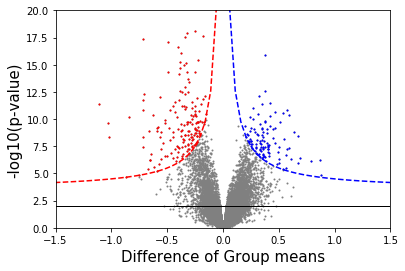

In [30]:
plt.scatter(x_val, y_val, s=1, c='grey')
plt.scatter(x_val[sel_1], y_val[sel_1], s=1, c='b')
plt.scatter(x_val[sel_2], y_val[sel_2], s=1, c='r')

plt.plot(np.arange(-2,2,0.1), 2*np.ones( len(np.arange(-2,2,0.1)) ), linewidth=1, color='k')
plt.plot(np.arange(0.01,2,0.05), Cutoff/(np.arange(0.01,2,0.05))+ pValCutoff, linestyle='--', color='b')
plt.plot(-np.arange(0.01,2,0.05), Cutoff/(np.arange(0.01,2,0.05))+ pValCutoff, linestyle='--', color='r')

ylim(0,20)
xlim(-1.5,1.5)
xlabel('Difference of Group means', fontsize=15)
ylabel('-log10(p-value)', fontsize=15)

plt.show()

In [31]:
# identify gene names
HighGene = pd.Series(x_val[sel_1].index)
LowGene = pd.Series(x_val[sel_2].index)

In [32]:
HighGene

0          LRR1
1          CD52
2       S100A11
3         CDCA5
4      C1orf135
5       PPP2R5C
6        FAM83D
7          MELK
8        DLGAP5
9        SLC7A5
10        SENP5
11         HES6
12         ECE2
13        NUDT1
14        CENPW
15         APOE
16         CKS2
17       KIF20A
18         CDK1
19         LAD1
20         ATL3
21        LAGE3
22         BZW2
23        KIF2C
24        CDC20
25       KDELR2
26        PTTG1
27     MGC72080
28       HOTAIR
29         EXO1
         ...   
77        NCBP2
78        PTTG3
79     C6orf115
80       S100A8
81       PPP3R1
82       CXCL10
83         TPX2
84       SEC61G
85        CDCA3
86     C16orf61
87        CNIH4
88         ANLN
89       FAM96B
90        CLCA2
91        IGSF5
92         UCP2
93         CBX2
94         CCL8
95       MTHFD2
96         EAF2
97         ECT2
98         OIP5
99     C20orf24
100    C1orf106
101       CHEK1
102       ASCL2
103       CEP55
104       MCM10
105      NKX2-2
106      TMSB10
Name: Hugo_Symbol, Lengt

In [33]:
HighGene.to_csv('tTest_HighGeneList_Volcano_ERpos.csv')
LowGene.to_csv('tTest_LowGeneList_Volcano_ERpos.csv')

# t Test_FDR

In [34]:
a = DF2[DF2['Group']=='MM']
b = DF2[DF2['Group']=='WM']
c = DF2[DF2['Group']=='OM']

In [35]:
t, p = ttest_ind(a.iloc[:,:-2].astype(float), b.iloc[:,:-2].astype(float), equal_var=False)

In [36]:
# m: difference (MM - WM)

m = a.mean(axis=0) - b.mean(axis=0)

SummaryDF = pd.DataFrame([t,p,m],columns=a.iloc[:,:-2].columns)

SummaryDF.index = ['t', 'p Value', 'difference']

In [37]:
SummaryDF

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839
t,-4.836991,-0.968086,0.561018,0.217560,-7.163822e+00,-0.721667,-2.356871,0.790477,0.661126,4.053408,...,0.032311,1.367447,0.640205,1.569823,0.041672,0.626326,-1.120149,-1.167645,1.694710,0.029294
p Value,0.000002,0.333857,0.575182,0.827930,4.382868e-12,0.471043,0.019060,0.429808,0.509080,0.000066,...,0.974249,0.172896,0.522541,0.117605,0.966789,0.531617,0.263470,0.243971,0.091276,0.976649
difference,-0.223928,-0.064891,0.006854,0.002994,-1.995526e-01,-0.085415,-0.090579,0.009391,0.008488,0.201846,...,0.000443,0.044407,0.009747,0.080238,0.001480,0.022213,-0.029374,-0.015749,0.107424,0.000392


In [38]:
Sorted = SummaryDF.sort_values(by='p Value', ascending=True, axis=1)

In [39]:
Sorted.loc['rank'] = np.arange(1,24363)

In [40]:
Sorted

Hugo_Symbol,LRRC48,DOC2A,TTC18,NF1,ZBTB4,TMEM101,CYB5D2,RUNDC1,RRNAD1,C16orf61,...,BX092796,GPR133,BC031668,C3orf1,AW139729,TUBB6,DRD2,ECHDC1,AK129717,NEO1
t,-1.066966e+01,-9.265730e+00,-9.253367e+00,-9.302714e+00,-9.312587e+00,-9.252608e+00,-9.177292e+00,-9.105411e+00,-8.741396e+00,8.804194e+00,...,-0.000573,-0.000508,0.000436,-0.000424,-0.000401,-0.000330,-0.000291,-0.000082,0.000065,-0.000039
p Value,9.839301e-24,8.002158e-19,1.164479e-18,2.269930e-18,2.665632e-18,4.742650e-18,8.442588e-18,2.129763e-17,8.386791e-17,1.240687e-16,...,0.999543,0.999595,0.999652,0.999662,0.999680,0.999737,0.999768,0.999935,0.999948,0.999969
difference,-5.526800e-01,-2.510722e-01,-3.248188e-01,-1.778424e-01,-3.368844e-01,-7.204419e-01,-4.957872e-01,-4.027036e-01,-3.802759e-01,3.742200e-01,...,-0.000007,-0.000006,0.000007,-0.000009,-0.000005,-0.000019,-0.000005,-0.000004,0.000003,-0.000002
rank,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,...,24353.000000,24354.000000,24355.000000,24356.000000,24357.000000,24358.000000,24359.000000,24360.000000,24361.000000,24362.000000


In [41]:
Sorted.loc['FDR'] = Sorted.loc['p Value', :]*Sorted.loc['rank']

In [42]:
Sorted

Hugo_Symbol,LRRC48,DOC2A,TTC18,NF1,ZBTB4,TMEM101,CYB5D2,RUNDC1,RRNAD1,C16orf61,...,BX092796,GPR133,BC031668,C3orf1,AW139729,TUBB6,DRD2,ECHDC1,AK129717,NEO1
t,-1.066966e+01,-9.265730e+00,-9.253367e+00,-9.302714e+00,-9.312587e+00,-9.252608e+00,-9.177292e+00,-9.105411e+00,-8.741396e+00,8.804194e+00,...,-0.000573,-0.000508,0.000436,-0.000424,-0.000401,-0.000330,-0.000291,-0.000082,0.000065,-0.000039
p Value,9.839301e-24,8.002158e-19,1.164479e-18,2.269930e-18,2.665632e-18,4.742650e-18,8.442588e-18,2.129763e-17,8.386791e-17,1.240687e-16,...,0.999543,0.999595,0.999652,0.999662,0.999680,0.999737,0.999768,0.999935,0.999948,0.999969
difference,-5.526800e-01,-2.510722e-01,-3.248188e-01,-1.778424e-01,-3.368844e-01,-7.204419e-01,-4.957872e-01,-4.027036e-01,-3.802759e-01,3.742200e-01,...,-0.000007,-0.000006,0.000007,-0.000009,-0.000005,-0.000019,-0.000005,-0.000004,0.000003,-0.000002
rank,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,...,24353.000000,24354.000000,24355.000000,24356.000000,24357.000000,24358.000000,24359.000000,24360.000000,24361.000000,24362.000000
FDR,9.839301e-24,1.600432e-18,3.493437e-18,9.079718e-18,1.332816e-17,2.845590e-17,5.909812e-17,1.703810e-16,7.548112e-16,1.240687e-15,...,24341.869460,24344.142411,24346.536576,24347.763455,24349.217118,24351.588247,24353.350483,24358.409286,24359.734407,24361.245550


In [43]:
x_val = Sorted.loc['difference',:]
y_val = -np.log10(Sorted.loc['FDR',:])

In [44]:
-np.log10(0.05)

1.3010299956639813

In [45]:
Cutoff = 0.5
FDRCutoff = -np.log10(0.05)

#sel_1 = ((x_val.abs() >0.5) & (y_val>-np.log10(0.01)) & (y_val>(2.5/x_val) +2)    )
sel_1 = ( (y_val>(Cutoff/x_val) + FDRCutoff) & (x_val>0)   )
print(len(x_val[sel_1]))

sel_2 = ( (y_val>(Cutoff/-x_val) + FDRCutoff) & (x_val<0)   )
print(len(x_val[sel_2]))

178
273


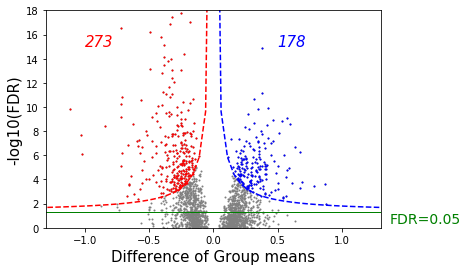

In [46]:
plt.scatter(x_val, y_val, s=1, c='grey')
plt.scatter(x_val[sel_1], y_val[sel_1], s=1, c='b')
plt.scatter(x_val[sel_2], y_val[sel_2], s=1, c='r')

plt.plot(np.arange(-2,2,0.1), FDRCutoff*np.ones( len(np.arange(-2,2,0.1)) ), linewidth=1, color='g')
plt.plot(np.arange(0.01,2,0.05), Cutoff/(np.arange(0.01,2,0.05))+ FDRCutoff, linestyle='--', color='b')
plt.plot(-np.arange(0.01,2,0.05), Cutoff/(np.arange(0.01,2,0.05))+ FDRCutoff, linestyle='--', color='r')

ylim(0,18)
xlim(-1.3,1.3)
xlabel('Difference of Group means', fontsize=15)
ylabel('-log10(FDR)', fontsize=15)

plt.text(0.5, 15, len(x_val[sel_1]), style='italic', color='b', fontsize=15)
plt.text(-1, 15, len(x_val[sel_2]), style='italic', color='r', fontsize=15)        

plt.text(0.92,0.14, 'FDR=0.05', fontsize=14, color='g', transform=plt.gcf().transFigure)

plt.show()

In [47]:
# identify gene names
HighGene = pd.Series(x_val[sel_1].index)
LowGene = pd.Series(x_val[sel_2].index)

In [48]:
HighGene

0      C16orf61
1          ATL3
2         CHEK1
3          EAF2
4      PPP1R14B
5       TMEM208
6         PTTG1
7         CDKN3
8         PTTG3
9        MRPS17
10        CDCA5
11        CENPN
12       FAM96B
13       TMSB10
14         GGCT
15         UCP2
16       SEC61G
17        CCNE1
18        IGSF5
19        SENP5
20       HIVEP2
21       ARPC5L
22     RAD51AP1
23         MELK
24     C20orf24
25      S100A11
26        CENPW
27         IDH2
28     MGC72080
29     C1orf135
         ...   
148        BRD7
149       H2AFX
150        POLQ
151       CCNB1
152       PDRG1
153       CXCL9
154      HOTAIR
155       CDCA8
156       KIF11
157       RPL29
158       CLCA2
159       STIP1
160    C11orf82
161        TARS
162       UBE2T
163       MTFR1
164        CCL8
165        ASPM
166      NKX2-2
167      MRPL13
168       HMGA1
169       FGFR4
170        ZIC2
171        GBP5
172      EPSTI1
173      DBNDD1
174        CD52
175        LAD1
176        CD3D
177      S100A9
Name: Hugo_Symbol, Lengt

In [49]:
HighGene.to_csv('FDR_HighGeneList_Volcano_ERpos.csv')
LowGene.to_csv('FDR_LowGeneList_Volcano_ERpos.csv')

In [50]:
writer = pd.ExcelWriter('GeneList_fromVolcanoPlot.xlsx')

HighGene.to_excel(writer, index=False, sheet_name='High_inGroup1')
LowGene.to_excel(writer, index=False, sheet_name='Low_inGroup1')

writer.save()

# Heatmap

In [279]:
DF3 = DF2[list(LowGene) + list(HighGene) +['Sample ID', 'Group'] ]

In [280]:
DF3

Hugo_Symbol,LRRC48,DOC2A,TTC18,NF1,ZBTB4,TMEM101,CYB5D2,RUNDC1,RRNAD1,NT5M,...,ZIC2,GBP5,EPSTI1,DBNDD1,CD52,LAD1,CD3D,S100A9,Sample ID,Group
MB-0891,6.67803,5.53911,5.86885,5.83082,9.64574,9.1939,8.74155,8.8079,8.31373,5.70793,...,7.09802,6.42263,7.52528,7.33166,8.27038,8.80306,7.90441,11.8154,MB-0891,MM
MB-0434,6.18276,5.11548,5.66326,5.7308,8.69603,7.05264,8.07577,7.67017,7.96032,5.56913,...,8.72491,6.28272,7.97283,9.77185,7.39382,11.4503,6.77592,13.7777,MB-0434,MM
MB-0666,5.76279,5.31351,5.79241,5.74414,9.06668,7.10196,7.08923,7.77874,7.79962,5.3706,...,5.33497,7.37624,9.70671,9.19642,8.45334,10.0083,8.40113,13.5094,MB-0666,MM
MB-0598,5.82775,5.31481,5.59278,5.4574,9.37097,8.45899,7.30199,8.0519,7.81836,5.7216,...,6.1868,7.11184,8.9416,8.60046,9.24333,7.94765,8.25582,11.8659,MB-0598,MM
MB-0382,6.5269,5.49527,5.78176,5.5257,9.67556,8.83413,7.82367,8.08157,8.59505,5.46428,...,6.75174,7.35054,8.95158,8.21627,9.3973,8.77239,8.98699,11.8994,MB-0382,MM
MB-0215,6.21296,5.388,5.84813,5.50827,9.29691,7.33949,7.81818,8.40811,7.74567,5.85217,...,5.49559,7.31444,10.1463,7.2775,8.37783,8.39522,8.13932,9.77413,MB-0215,MM
MB-0306,6.55065,5.45694,5.79676,5.7776,9.23754,8.57922,7.34924,8.78265,7.70889,5.27609,...,7.92646,8.06306,9.76791,8.63933,9.33822,8.83287,9.23653,10.0543,MB-0306,MM
MB-0363,6.05167,6.05771,5.69115,5.82614,9.76056,8.87678,8.48291,8.55614,7.90457,6.12255,...,6.28561,8.80805,9.43154,7.24663,11.4188,9.65014,10.6559,8.08867,MB-0363,MM
MB-0379,5.8844,5.70854,5.57638,5.97171,9.17644,8.31105,7.3598,7.9514,7.52477,5.54218,...,6.18685,7.14611,9.82985,7.95704,9.5898,7.88218,8.60946,7.4457,MB-0379,MM
MB-0624,6.55513,5.27332,6.48096,5.97859,9.68437,9.18839,8.45672,8.9733,8.07997,5.947,...,5.76063,6.46544,8.04715,6.63337,9.67415,7.18714,8.28248,8.43257,MB-0624,MM


In [316]:
# APscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(DF3['Group'].unique(), ['orange', 'lightgreen', 'yellow']))

#Cell2 = dict(zip(DF3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = DF3['Group'].map(Cell)
#row_colors2 = DF3['Treatment'].map(Cell2)

col_colors = list(['blue'])*len(LowGene) + list(['red'])*len(HighGene)

In [317]:
df = DF3.iloc[:,:-2].astype(float)
df_norm_col=(df-df.mean())/df.std()

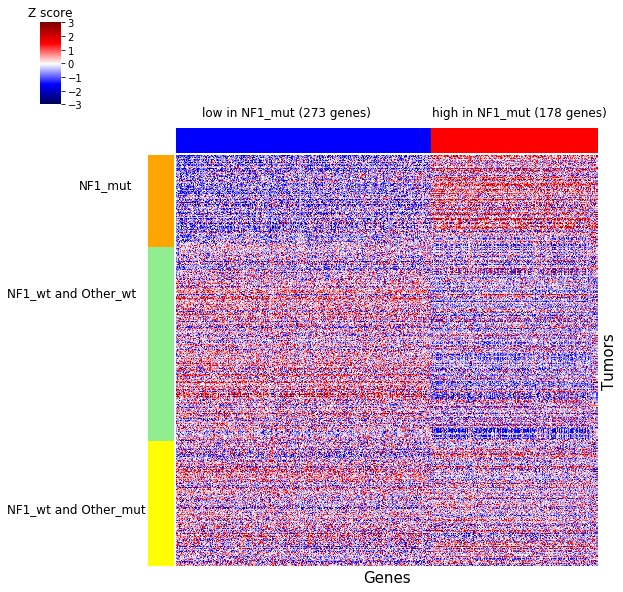

In [318]:
g = sns.clustermap(df_norm_col, row_colors=[row_colors], col_colors=col_colors, cmap="seismic" ,vmin=-3, vmax=3, 
                   row_cluster=False ,col_cluster=False,)
                  #figsize=(16,16))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0,)

ax = g.ax_heatmap
ax.set_xlabel("Genes", fontsize=15)
ax.set_ylabel("Tumors", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])

ax.text(0.08,0.2, 'NF1_wt and Other_mut', fontsize=12, color='k', transform=plt.gcf().transFigure)
ax.text(0.08,0.5, 'NF1_wt and Other_wt', fontsize=12, color='k', transform=plt.gcf().transFigure)
ax.text(0.18,0.65, 'NF1_mut', fontsize=12, color='k', transform=plt.gcf().transFigure)


ax.text(0.35,0.75, 'low in NF1_mut (273 genes)', fontsize=12, color='k', transform=plt.gcf().transFigure)
ax.text(0.67, 0.75, 'high in NF1_mut (178 genes)', fontsize=12, color='k', transform=plt.gcf().transFigure)

plt.title('Z score')

plt.show()

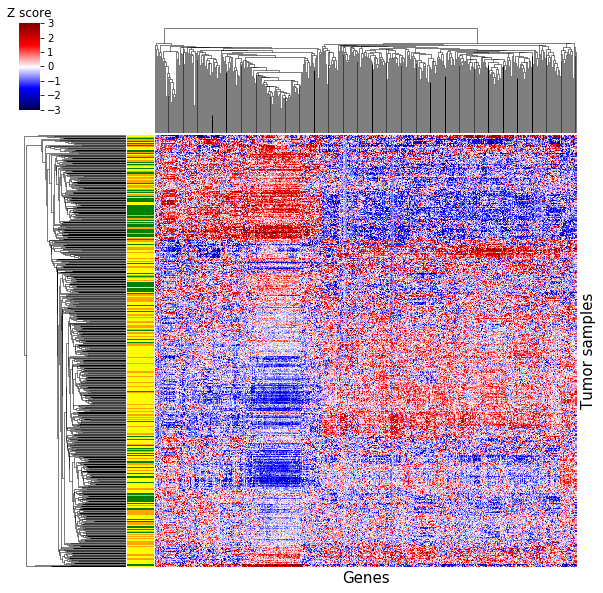

In [284]:
g = sns.clustermap(df_norm_col, row_colors=[row_colors], cmap="seismic" ,vmin=-3, vmax=3, 
                   row_cluster=True ,col_cluster=True,)
                  #figsize=(16,16))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0,)

ax = g.ax_heatmap
ax.set_xlabel("Genes", fontsize=15)
ax.set_ylabel("Tumor samples", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Z score')

plt.show()

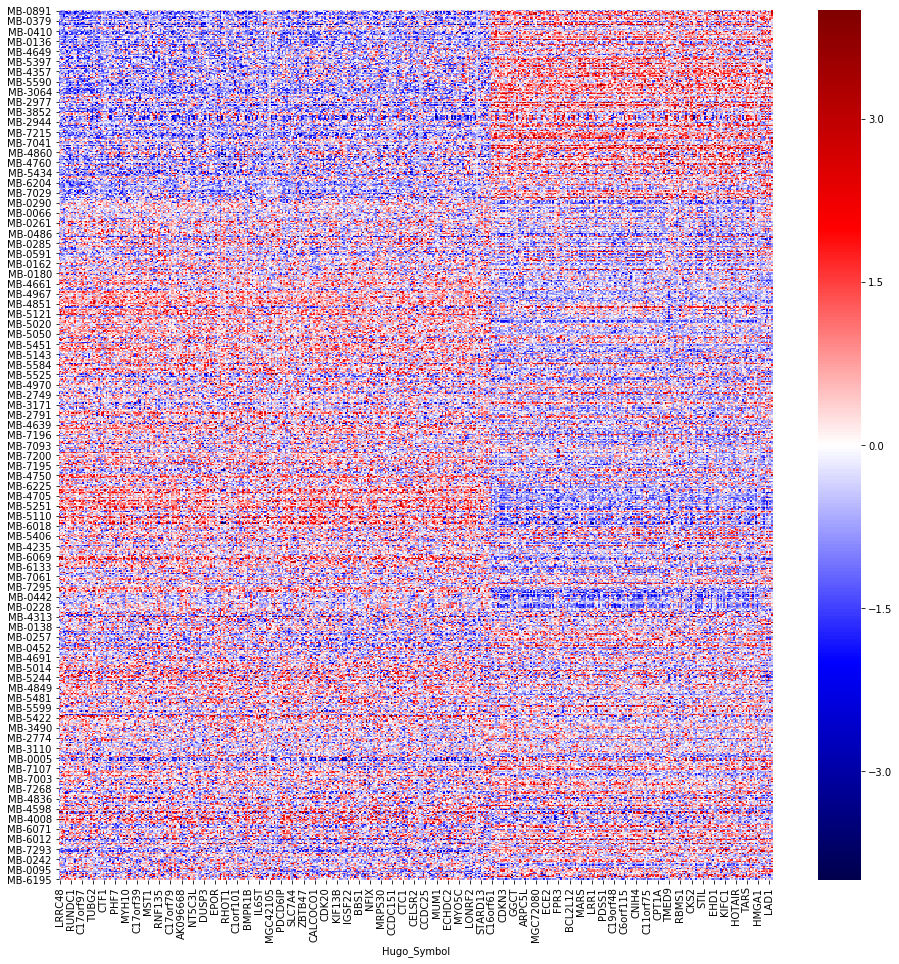

In [285]:
plt.figure(figsize=(16,16))

df_norm_col=(df-df.mean())/df.std()
sns.heatmap(df_norm_col, cmap='seismic',vmin=-4, vmax=4)


plt.show()